# The Logic of Unsupervised Evaluation : A simple demonstration

Unsupervised evaluation is trying to test noisy decision makers with unlabeled data. This is the principal/agent monitoring paradox. A job has been delegated to an agent - whether robotic or human. But we know the agents are not perfect in their decisions. In some settings, this imperfection is unsafe and must be detected to prevent possible future costly failures. The paradox lies in us having to then "do the work twice" - on the very job for which we deployed the agent, we must audit the results!

We hear this often nowadays with LLMs - they are great until they are not. They speed up our work but now we have to do work to check they are doing their tasks correctly. NTQR logic is about mitigating this monitoring paradox by increasing the reliability of unsupervised evaluation.

The utility of NTQR logic comes from three properties:

1. It is **universal**: The solution for error independent classifiers in the code applies to all domains as long as its sole assumption is satisfied - error independency on the test. But more importantly, the postulates in `ntqr.r2.postulates` are **always** true for any group of classifiers in **any** domain. It achieves this by being completely algebraic on the observed decisions of the classifiers. It has no other parameters to tune or set to produce its outputs.
2. It is **complete**: Universal postulates have been recognized before. Most notably, Platanios et al., in the **agreement equations**. What has not been recognized at all by most ML researchers and engineers is that there are a complete set of postulates that explain **any** unsupervised evaluation of classifiers. The agreement equations are but a small subset of the complete set needed for classifiers. The power of completeness for safety is that it provides ironclad proof that an evaluation cannot possibly be correct.
3. It allows you to create **self-alarming** evaluation algorithms: The finite nature of any test for classifiers allows us to restrict all solutions of sample statistics to a small set of rational numbers inside the unit cube. Since the algebraic algorithms of NTQR logic are polynomial functions of unknown statistics of correctness for the classifiers, they always produce **algebraic** numbers. The class of **algebraic** numbers also includes the **irrationals**. Using this, one can prove that if you evaluate a set of three binary classifiers and the prevalence estimates contain irrational numbers - the classifiers **are** error correlated on the test. We know of no other evaluation method on unlabeled data that can signal the failure of its own independence assumption.

## A simple demonstration of their universality

We say the expressions in `ntqr.r2.paxioms` and `ntqr.r2.raxioms` are postulates because they are always identically zero for sample statistics that come from summarizing the decisions of binary classifiers. This section will demonstrate this with the example data sketch from an UCI Adult dataset evaluation contained in `ntqr.r2.examples`.

In [5]:
import sympy
import ntqr
from pprint import pp
sympy.init_session()
sympy.init_printing(latex_mode='equation')

IPython console for SymPy 1.13.3 (Python 3.11.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



The by-label counts of how the classifiers voted when classifying a single item are only available when we have supervised
evaluation - we know the correct label for the items classified. The reason that it contains the aligned counts for three classifiers
is that this is the minimum needed to obtain a full solution to tests where classifiers are error independent on the test.

The count of three thus makes this example easy to use throughout the documentation. The axioms released so far are applicable to any number of classifiers. For example, the pair postulates apply to any pair you pick out from an ensemble. But as of v0.3.2 only the N <= 3 postulates have been released for the case R=2 (binary classification or responses). The current release contains the R=3 single classifier axioms that can be used to create logical alarms for misaligned 3-class classification.

In the examples shown here, we check the postulates up to N = 2 for R=2.

In [7]:
from ntqr.r2.examples import uciadult_label_counts as data_sketch
data_sketch

{'a': {('a', 'a', 'a'): 715,
  ('a', 'a', 'b'): 161,
  ('a', 'b', 'a'): 2406,
  ('a', 'b', 'b'): 455,
  ('b', 'a', 'a'): 290,
  ('b', 'a', 'b'): 94,
  ('b', 'b', 'a'): 1335,
  ('b', 'b', 'b'): 231},
 'b': {('a', 'a', 'a'): 271,
  ('a', 'a', 'b'): 469,
  ('a', 'b', 'a'): 3395,
  ('a', 'b', 'b'): 7517,
  ('b', 'a', 'a'): 272,
  ('b', 'a', 'b'): 399,
  ('b', 'b', 'a'): 6377,
  ('b', 'b', 'b'): 12455}}

Let us use these by-label voting events counts to calculate the exact evaluation for the classifiers on this test.

In [9]:
# Create a class that gives us convenience functions for
# making marginalized counts or percentages of counts.
trio_label_counts = ntqr.TrioLabelVoteCounts(data_sketch)
# Since we know the true label for this evaluation, we can
# quickly compute all the relevant statistics of correctness
# in the test we need.
supervised_eval = ntqr.SupervisedEvaluation(trio_label_counts)
supervised_eval_exact = supervised_eval.evaluation_exact
supervised_eval_float = supervised_eval.evaluation_float

We are so accustomed to turning numbers into floats in our computers that we forget that for any finite test the sample statistics of correctness can only be rational numbers. In the case of grading a test, we either have integers or ratios of integers - the rationals.

In [11]:
# The current version does not implement the last correlations needed
# for three binary classifiers - the 3-way correlations.
pp(supervised_eval_exact, sort_dicts=False)

{'prevalence': {'a': 5687/36842, 'b': 31155/36842},
 'accuracy': [{'a': 3737/5687, 'b': 6501/10385},
              {'a': 1260/5687, 'b': 29744/31155},
              {'a': 4746/5687, 'b': 4168/6231}],
 'pair_correlation': {(0, 1): {'a': 273192/32341969, 'b': 2204576/323544675},
                      (0, 2): {'a': 13325/32341969, 'b': -79682/12941787},
                      (1, 2): {'a': -264525/32341969, 'b': 94508/38825361}},
 '3_way_correlation': {(0, 1, 2): {'a': 452568508/183928777703,
                                   'b': -27265589/134400457995}}}


Although exact, these numbers are hard for humans to interpret since we prefer decimal numbers.

In [13]:
pp(supervised_eval_float, sort_dicts=False)

{'prevalence': {'a': 0.15436186960534173, 'b': 0.8456381303946583},
 'accuracy': [{'a': 0.6571127132055565, 'b': 0.625999037072701},
              {'a': 0.22155793915948654, 'b': 0.9547103193708875},
              {'a': 0.8345349041673993, 'b': 0.6689134970309741}],
 'pair_correlation': {(0, 1): {'a': 0.008446981072797392,
                               'b': 0.0068138225424356005},
                      (0, 2): {'a': 0.00041200336318422665,
                               'b': -0.006156954986200901},
                      (1, 2): {'a': -0.008179001099160041,
                               'b': 0.0024341821316226785}}}


Note that this UCI Adult evaluation has, in fact, very low error correlations. This was done so we could use the same experiments for demonstrating the error-independent algebraic solution. For the purposes of demonstrating the logic, since we are doing exact arithmetic, the fact that the correlations are not identical to zero is sufficient for demonstrating their correctness.

Using the "ground truth" or correct evaluation for the classifiers on this specific test, we can now check to see if the postulates are obeyed.

## The NTQR postulates for N=2, R=2 binary classifiers

In [16]:
from ntqr.r2.paxioms import single_binary_classifier_axiom

Whenever we have $N$ classifiers, there will be some postulates for all $N$ of them signalled by its use of N-way error correlations. There will also be postulates for $N-1$ of them and so on down to $N=1$. So let us demonstrate them backwards. We start with the single postulate that applies to any single binary classifier.

### The single binary classifier postulate check

In [19]:
single_binary_classifier_axiom

Let's redefine some names to make the checks easier to write out.

In [21]:
pa = supervised_eval_exact['prevalence']['a']
pb = supervised_eval_exact['prevalence']['b']
print(pa, " ", pb)

5687/36842   31155/36842


We also need to know the label accuracy for each of the three classifiers.

In [23]:
classifier_accuracies = [
    {label: supervised_eval_exact['accuracy'][classifier][label]
     for label in ('a', 'b')
    } for classifier in range(3)]
cla = classifier_accuracies
cla
    

[{'a': 3737/5687, 'b': 6501/10385},
 {'a': 1260/5687, 'b': 29744/31155},
 {'a': 4746/5687, 'b': 4168/6231}]

The practical utility of the algebraic postulates is that they establish a relation between statistics of correctness we are trying to estimate and the only thing we can do when we treat them as a black box - the frequencies of how they decide to agree and disagree.

In an unlabeled setting, we do not have the true labels by definition. So to create a universal logic of computation, you can only use the observed decisions. Anything else, any modeling assumption, etcetera would restrict its domain of application.

This still leaves a lot of choices. You could keep track of the sequence by which they decided if time was an important variable in your task, for example. Here we will focus on the simplest statistic - their aligned votes on a single item. "Aligned" means two things. The event ('a', 'b', 'a') refers to votes cast by the classifiers on the same item. Classifiers 1 and 3 think the item is 'a', but 2 votes 'b'. The order of the vote patterns always refers to the same classifiers - the 2nd meaning of "aligned". So in event ('a', 'b', 'a') classifier 1 voted 'a' and in event ('b', 'a', 'a') it voted 'b'.

The package has a class that turns by-label data sketches to unlabeled data sketches - `TrioVoteCounts`.

In [25]:
trio_vote_counts = trio_label_counts.to_TrioVoteCounts()
print(trio_vote_counts)
tvc = trio_vote_counts

TrioVoteCounts(vote_counts={('a', 'a', 'a'): 986, ('a', 'a', 'b'): 630, ('a', 'b', 'a'): 5801, ('a', 'b', 'b'): 7972, ('b', 'a', 'a'): 562, ('b', 'a', 'b'): 493, ('b', 'b', 'a'): 7712, ('b', 'b', 'b'): 12686})


This highlights that in the unlabeled case we are seeing the sum of the by-label counts. So the by-label data sketch of the evaluation had 715 cases where the classifiers voted ('a', 'a', 'a') and the items where 'a'. But there where 271 cases where the items where 'b' and the classifiers also voted ('a', 'a', 'a'). 271 + 715 = 986 as we observe above.

In [27]:
# We can turn the count integers into percentages or frequencies
classifiers_voting_frequencies = [
    {label: tvc.classifier_label_frequency(classifier, label) 
     for label in ('a', 'b')
    } for classifier in range(3)]
cvf = classifiers_voting_frequencies
cvf

[{'a': 15389/36842, 'b': 21453/36842},
 {'a': 2671/36842, 'b': 34171/36842},
 {'a': 15061/36842, 'b': 21781/36842}]

In [28]:
# By construction, these observed label voting frequencies must add to one.
[sum(cvf[classifier].values()) for classifier in range(3)]

In [29]:
# Checking the single binary classifier postulate on all three classifiers
[ (pa * (cla[classifier]['a'] - cvf[classifier]['a']) - 
   pb * (cla[classifier]['b'] - cvf[classifier]['b']))
 for classifier in range(3)]

#### Simple demonstration of the utility of exact over inexact calculations for logic

How well are the postulates obeyed when we use inexact float computations?

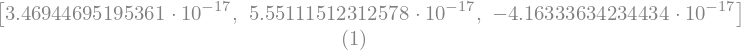

In [32]:
# Checking the single binary classifier postulate on all three classifiers
# but now we use floats

[ (float(pa) * (float(cla[classifier]['a']) - float(cvf[classifier]['a'])) - 
   float(pb) * (float(cla[classifier]['b']) - float(cvf[classifier]['b'])))
 for classifier in range(3)]

In [33]:
# It gets worse when we use the fact that P_b = 1 - P_a

[ (float(pa) * (float(cla[classifier]['a']) - float(cvf[classifier]['a'])) - 
   float(1-pb) * (float(cla[classifier]['b']) - float(cvf[classifier]['b'])))
 for classifier in range(3)]

### The postulates for pairs of binary classifers

Single classifier axioms do not require us to worry about how a classifier may be error correlated with another member that took the same test. Sample statistics of the error correlations between the classifiers need to be introduced for groups of two or more classifiers. These correlation variables are of the form, $\Gamma_{i,j,\ell_\text{true}}.$ This means that explaining the agreements and disagreements between classifiers is now a polynomial of their label accuracies **and** their error-correlations. Nonetheless, there are universal axioms that can explain **all** agreements and disagreements between arbitrarily correlated classifiers. The case we work out here as an illustration is for pairs of binary classifiers.

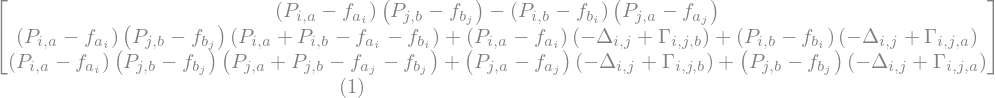

In [35]:
from ntqr.r2.paxioms import pair_binary_classifiers_axioms
display(sympy.Matrix(pair_binary_classifiers_axioms))

Starting with pairs of classifiers, one must worry about their error correlation on the test. This requires we introduce new sample statistics to capture this "moment" of the unknown sample statistics. We are treating evaluation on unlabeled data as an inverse problem so we are basically doing a moment expansion on the unknown ways a single classifier can be correct, pairs can correlate, trios can correlate, etc.

In [37]:
# The first postulate is interesting because it does not
# involve the unknown pair error correlations.

pair_binary_classifiers_axioms[0].as_expr()

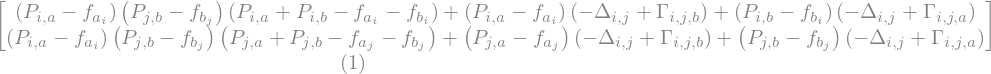

In [38]:
# But the other two do.
# Note that they are symmetric in label and indices i,j.
sympy.Matrix(pair_binary_classifiers_axioms[1:3])

#### Checking the pair postulates

Let's use SymPy to carry out the translation from the polynomial expressions above to a numerical value given the true values for all these test sample statistics.

In [41]:
# The decision frequencies we can calculate from the test data sketch
from ntqr.r2.paxioms import fai, fbi, faj, fbj, deltaij
# The label paxioms for an arbitrary pair of classifiers
from ntqr.r2.paxioms import pia, pib, pja, pjb
# The pair error correlation variables
from ntqr.r2.paxioms import gija, gijb

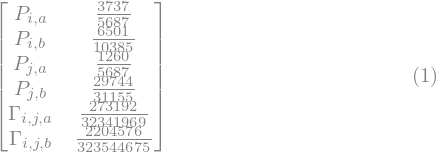

In [42]:
i, j = (0, 1)
values = {pia: cla[i]['a'], pib: cla[i]['b'], 
          pja: cla[j]['a'], pjb: cla[j]['b'],
          gija: supervised_eval_exact['pair_correlation'][(i,j)]['a'],
          gijb: supervised_eval_exact['pair_correlation'][(i,j)]['b']}
sympy.Matrix([(key, val) for key, val in values.items()])

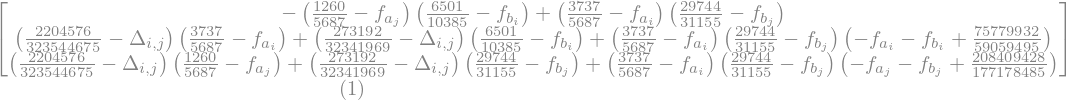

In [43]:
# Let's take a look at the postulates now that we have specified 
# the unknown sample statistics of correctness.
# We should only have variables left that are moments of the test data sketch

sympy.Matrix([axiom.subs(values) 
              for axiom in pair_binary_classifiers_axioms])

In [44]:
# Let's create a dict for the quantities we can calculate from the data sketch
# The pair frequency moment is label independent even though it is calculated 
# using only a single label!
pair_moment_a = tvc.pair_frequency_moment((i, j), 'a')
pair_moment_b = tvc.pair_frequency_moment((i, j), 'b')
pair_moment_a == pair_moment_b

True

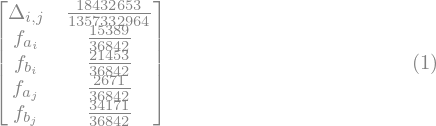

In [45]:
obsv_values = {deltaij: pair_moment_b,
              fai: cvf[i]['a'], fbi: cvf[i]['b'],
              faj: cvf[j]['a'], fbj: cvf[j]['b']}
sympy.Matrix([(key, val) 
              for key, val in obsv_values.items()])

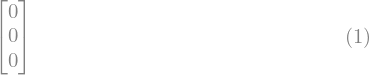

In [46]:
# The final check, all entries should be identically zero

sympy.Matrix([axiom.subs({**values, **obsv_values}) 
              for axiom in pair_binary_classifiers_axioms])